# MLP -- demo

# Understanding the training loop 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


### Download the data

In [0]:

import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.squeeze()),  # Squeeze the data to remove the redundant channel dimension
                                ])


trainset = torchvision.datasets.MNIST(root='./data_mnist',
                                      train=True,
                                      download=True,
                                      transform=transform
                                      )

testset = torchvision.datasets.MNIST(root='./data_mnist',
                                     train=False,
                                     download=True,
                                     transform=transform
                                     )


  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20090106.02it/s]                            


Extracting ./data_mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw


32768it [00:00, 331424.97it/s]
0it [00:00, ?it/s]

Extracting ./data_mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw


1654784it [00:00, 5329975.27it/s]                           
8192it [00:00, 131774.75it/s]


Extracting ./data_mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_mnist/MNIST/raw
Extracting ./data_mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_mnist/MNIST/raw
Processing...
Done!


### Make a three layer net class

In [0]:
class ThreeLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(ThreeLayerNet , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1, bias=False)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2, bias=False)
        self.layer3 = nn.Linear(hidden_size2, output_size, bias=False)
        
    def forward(self, x):
        y       = self.layer1(x)
        y_hat   = F.relu(y)
        z       = self.layer2(y_hat)
        z_hat   = F.relu(z)
        scores  = self.layer3(z_hat)
        return F.softmax(scores, dim=1)


### Build the net

In [0]:
net=ThreeLayerNet(784, 50, 50, 10)
print(net)

three_layer_net(
  (layer1): Linear(in_features=784, out_features=50, bias=False)
  (layer2): Linear(in_features=50, out_features=50, bias=False)
  (layer3): Linear(in_features=50, out_features=10, bias=False)
)


### Choose the criterion, optimizer, learning rate, and batch size

In [0]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(net.parameters() , lr=0.1)

bs=128

### Create DataLoaders that sample data from the dataset





In [0]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=bs,
                                          shuffle=True,  # Shuffle the dataset for random ordering of train samples
                                          drop_last=True
                                          )

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=bs,
                                         shuffle=True,
                                         drop_last=True
                                         )

### Train the network on the train set (one epoch)

In [0]:

for epoch in range(1, 5):

  for i, (minibatch_data, minibatch_label) in enumerate(trainloader):

      # Set dL/dU, dL/dV, dL/dW to be filled with zeros
      optimizer.zero_grad()
      
      #reshape the minibatch
      inputs = minibatch_data.view(bs, 784)

      # forward the minibatch through the net  
      prob=net(inputs) 
      
      # Compute the average of the losses of the data points in the minibatch
      loss = criterion(prob , minibatch_label) 
      
      # backward pass to compute dL/dU, dL/dV and dL/dW    
      loss.backward()
      
      # do one step of stochastic gradient descent: U=U-lr(dL/dU), V=V-lr(dL/dU), ...
      optimizer.step()
      


### Choose image at random from the test set and see how good/bad are the predictions

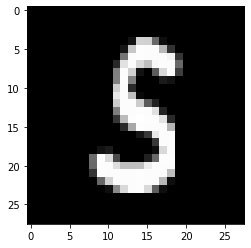

Confidence scores:
0: 0.003607128979638219
1: 2.590876135855069e-07
2: 5.017972944187932e-05
3: 0.7200882434844971
4: 5.648275180902829e-09
5: 0.00025040956097655
6: 0.0003218689525965601
7: 1.6678912417855685e-10
8: 0.2756698429584503
9: 1.2015302672807593e-05

Label with highest confidence score: 3


In [0]:
import numpy as np
import matplotlib.pyplot as plt

# choose a picture at random
im_minibatch, label_minibatch = iter(testloader).next()
im, label = im_minibatch[0], label_minibatch[0]

# Function to show an image tensor
def show(X):
    if X.dim() == 3 and X.size(2) == 3:
        plt.imshow(X.numpy())
        plt.show()
    elif X.dim() == 2:
        plt.imshow(   X.numpy() , cmap='gray'  )
        plt.show()
    else:
        print('WRONG TENSOR SIZE')

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob = net(im.view(1,784)) 

print('Confidence scores:\n' + '\n'.join(['{}: {}'.format(i, p.item()) for i, p in enumerate(prob.squeeze())]))

print('\nLabel with highest confidence score: {}'.format(torch.argmax(prob).item()))
